In [1]:
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist
(train_x, train_y),(test_x, test_y)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_x, test_x=train_x/255.0, test_x/255.0

In [5]:
for x in train_x[0]:
    num_str=""
    for i in x:
        num_str=num_str+str(i)+"\t"
    print(num_str)

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.011764705882352941	0.07058823529411765	0.07058823529411765	0.07058823529411765	0.49411764705882355	0.5333333333333333	0.6862745098039216	0.10196078431372549	0.6509803921568628	1.0	0.9686274509803922	0.4980392156862745	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.11764705882352941	0.1411764705882353	0.3686274509803922	0.6039215686274509	0.6666666666666666	0.9921568627450981	0.9

In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
train_x=train_x.reshape((train_x.shape[0],28,28,1))
test_x=test_x.reshape((test_x.shape[0],28,28,1))

In [8]:
train_x.shape

(60000, 28, 28, 1)

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='SAME',
                           input_shape=(28,28,1)),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='SAME',
                           input_shape=(14,14,1)),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=128,activation='relu'),
   tf.keras.layers.Dense(units=10, activation='softmax')                              
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [15]:
#모델 컴파일
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
model.fit(train_x, train_y, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0831 - accuracy: 0.9742
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0384 - accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0149 - accuracy: 0.9948


In [18]:
test_loss, test_acc=model.evaluate(test_x,test_y)

313/313 [==============================] - 4s 12ms/step - loss: 0.0272 - accuracy: 0.9911


In [20]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


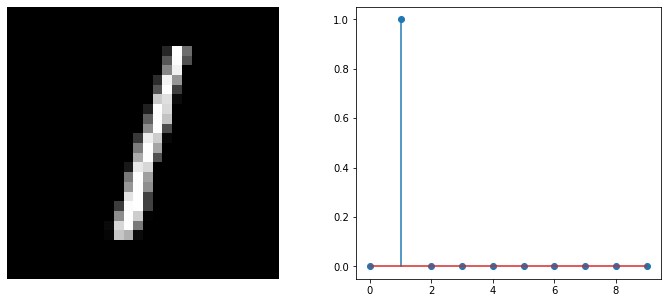

Prediction : 1


In [24]:
test=test_x[[2]]
predict=model.predict_on_batch(test)
mypred=np.argmax(predict, axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(test.reshape(28,28), 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

In [25]:
model.save('Predict_Model.h5')